## Building a CNN using Keras¶
Dataset Fashion MNIST

In [1]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Input,Convolution2D,MaxPooling2D,Flatten,Dense,Dropout
from keras.utils import np_utils
import tensorflow

Data Preparation

In [3]:
x = pd.read_csv("./fashion-mnist_train.csv")
X_ = np.array(x)
X = X_[:,1:]
X = X/255.0
y = X_[:,0]
print(X.shape,y.shape) #10 classes

(60000, 784) (60000,)


In [4]:
np.unique(y,return_counts=True) #Well Balanced

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000],
       dtype=int64))

In [5]:
X_train = X.reshape((-1,28,28,1))
Y_train = np_utils.to_categorical(y)

print(X_train.shape,Y_train.shape)

(60000, 28, 28, 1) (60000, 10)


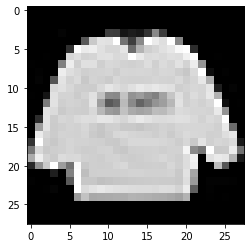

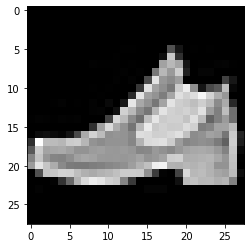

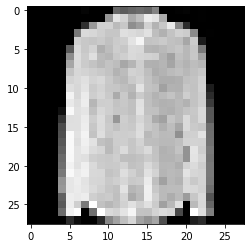

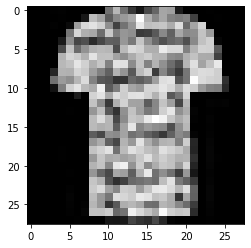

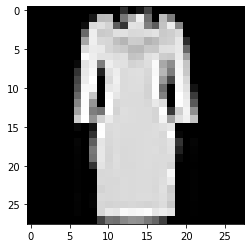

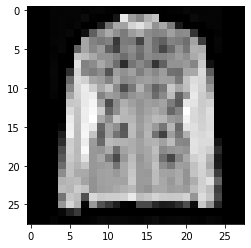

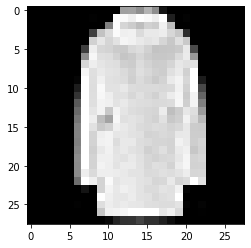

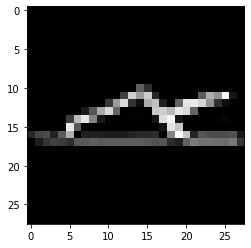

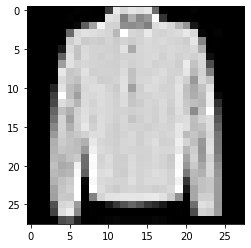

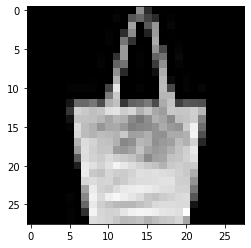

In [8]:
import matplotlib.pyplot as plt
for i in range(10):
    plt.imshow(X_train[i].reshape(28,28),cmap="gray")
    plt.show()

## CNN Model

In [9]:
model = Sequential()
model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(Convolution2D(64,(3,3),activation='relu'))
model.add(Dropout(0.25))
model.add(MaxPooling2D(2,2))
model.add(Convolution2D(32,(5,5),activation='relu'))
model.add(Convolution2D(8,(5,5),activation='relu'))
model.add(Flatten())
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 32)          51232     
                                                                 
 conv2d_3 (Conv2D)           (None, 4, 4, 8)           6408      
                                                        

In [10]:
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [11]:
hist = model.fit(X_train,Y_train,epochs=20,shuffle=True,batch_size=256,validation_split=0.20)

Epoch 1/20
188/188 [==============================] - 127s 666ms/step - loss: 0.7660 - accuracy: 0.7240 - val_loss: 0.5615 - val_accuracy: 0.8030
Epoch 2/20
188/188 [==============================] - 124s 661ms/step - loss: 0.4515 - accuracy: 0.8375 - val_loss: 0.4205 - val_accuracy: 0.8595
Epoch 3/20
188/188 [==============================] - 126s 670ms/step - loss: 0.3819 - accuracy: 0.8664 - val_loss: 0.3960 - val_accuracy: 0.8683
Epoch 4/20
188/188 [==============================] - 124s 657ms/step - loss: 0.3449 - accuracy: 0.8784 - val_loss: 0.3703 - val_accuracy: 0.8802
Epoch 5/20
188/188 [==============================] - 124s 661ms/step - loss: 0.3162 - accuracy: 0.8870 - val_loss: 0.3367 - val_accuracy: 0.8902
Epoch 6/20
188/188 [==============================] - 125s 666ms/step - loss: 0.2957 - accuracy: 0.8947 - val_loss: 0.3261 - val_accuracy: 0.8905
Epoch 7/20
188/188 [==============================] - 124s 661ms/step - loss: 0.2791 - accuracy: 0.9004 - val_loss: 0.3094 -

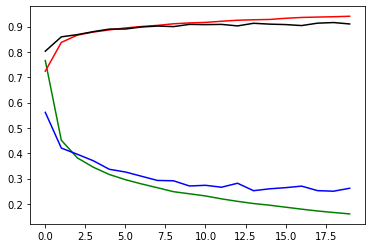

In [13]:
plt.figure(0)
plt.plot(hist.history['loss'],'g')
plt.plot(hist.history['val_loss'],'b')

plt.plot(hist.history['accuracy'],'r')
plt.plot(hist.history['val_accuracy'],'black')
plt.show()